In [1]:
include("AZP_env2.jl")

score_test (generic function with 1 method)

In [4]:
env = init_Env(["11", "100", "64", "8", "500", "800", "1", "512", "0.3", "0.25", "1.0", "1.5", "3.0", "2", "2", "256", "1.25", "0.000001", "5"])

max_turn:  11
num_player:  100
middle_dim:  64
depth:  8
training_step:  500
batch_size:  800
batch_num:  1
num_simulation:  512
α:  0.3
frac:  0.25
ratio:  1.0
ratio_r:  1.5
test trΛρ: 1.0
trial:: KL_loss:0.017927956, final_loss:0.0004533852
trσ:1.0, trΛσ:1.0000001
trial:: KL_loss:0.03740319, final_loss:0.0016157494
trσ:1.0, trΛσ:1.0000002
trial:: KL_loss:0.14990628, final_loss:0.0059164343
trial:: KL_loss:0.02125261, final_loss:0.00077897956
trσ:1.0, trΛσ:1.0000001
trial:: KL_loss:0.14395046, final_loss:0.0062023904
trial:: KL_loss:0.12361854, final_loss:0.0035726822
trial:: KL_loss:0.04492009, final_loss:0.0009834606
trσ:1.0, trΛσ:1.0000001
trial:: KL_loss:0.017879955, final_loss:0.0005035371
trσ:1.0, trΛσ:1.0000001
setting Env done


Env(11, 100, 2, 1, 4, 7, 77, 64, 8, 8, 500, 200, 800, 1, 1.0f-5, 0.9f0, 512, 0.3f0, 0.25f0, 1.0f0, 1.5f0, 3.0f0, 2, 2, 4, DMs(2, 2, 4, ComplexF32[0.5378917f0 + 0.0f0im 0.15755852f0 + 0.36192396f0im; 0.15755852f0 - 0.36192396f0im 0.46210828f0 + 0.0f0im], ComplexF32[0.6241812f0 + 0.0f0im 0.013718411f0 + 0.3213629f0im; 0.013718411f0 - 0.3213629f0im 0.37581882f0 + 0.0f0im], ComplexF32[0.024123132f0 + 0.5651001f0im 0.035171628f0 + 0.8239193f0im; -0.82466966f0 + 0.0f0im 0.56561476f0 + 0.0f0im], Float32[0.15520544, 0.8447946], ComplexF32[-0.5510328f0 + 0.18974718f0im -0.063224f0 - 0.41707134f0im 0.42669705f0 + 0.2063795f0im 0.18978211f0 - 0.47088492f0im; -0.19601819f0 - 0.08889392f0im -0.65855485f0 + 0.26225647f0im -0.39389044f0 - 0.16389424f0im 0.48531646f0 - 0.18346298f0im; -0.14688192f0 - 0.54847634f0im -0.2663676f0 - 0.24331409f0im -0.25759304f0 + 0.13500056f0im -0.64023364f0 - 0.23014675f0im; -0.19416922f0 + 0.503916f0im 0.19299981f0 - 0.39010078f0im -0.7132548f0 + 0.003774407f0im -0.060

In [7]:

test = Λρ(Hermitian(0.5f0*Matrix{ComplexF32}(I, 2, 2)), env.dms)

2×2 Hermitian{ComplexF32, Matrix{ComplexF32}}:
 0.486666+0.0im        0.148688-0.0642386im
 0.148688+0.0642386im  0.513334+0.0im

In [8]:
using RandomMatrix

In [11]:
test_unit = ComplexF32.(randUnitary(4))

4×4 Matrix{ComplexF32}:
 0.0372612+0.368571im  -0.543601+0.173916im   …    0.415212+0.395438im
 -0.539074-0.515946im   0.198524+0.0488724im       0.570968+0.265239im
  0.146745-0.482763im  -0.364174-0.0376848im       0.104729-0.496802im
 -0.115475-0.195032im  -0.663551-0.241057im      -0.0291125-0.127449im

In [12]:
test_unit* test_unit'

4×4 Matrix{ComplexF32}:
         1.0+0.0im          …  -1.64789f-8-1.66166f-8im
 -8.15454f-9-2.083f-8im          7.1352f-9+1.31998f-8im
  5.61985f-9+8.98484f-10im     -3.60203f-8-1.17525f-8im
 -1.64789f-8+1.66166f-8im              1.0+0.0im

In [17]:
function init_dms2(s_dim::Int, e_dim::Int)
    tot_dim = s_dim * e_dim
    s_dm = make_rand_dm(s_dim)
    e_dm = make_rand_dm(e_dim)
    e_es, e_evs = eigen(e_dm)
    #s_es, s_evs = eigen(s_dm)
    U = ComplexF32.(randUnitary(tot_dim))
    #make_unitary(tot_dim, τ)
    e_evsa = make_ev(e_evs, e_dim, s_dim)
    Ms = make_Mk(U, e_evsa, e_dim, s_dim)
    return DMs(s_dim, e_dim, tot_dim, s_dm, e_dm, e_evs, e_es, U, Ms)
end

init_dms2 (generic function with 1 method)

In [48]:
dms2 = init_dms2(2, 2)

DMs(2, 2, 4, ComplexF32[0.36316675f0 + 0.0f0im 0.3789686f0 + 0.14548294f0im; 0.3789686f0 - 0.14548294f0im 0.63683325f0 + 0.0f0im], ComplexF32[0.6735224f0 + 0.0f0im 0.40491372f0 + 0.22312024f0im; 0.40491372f0 - 0.22312024f0im 0.3264776f0 + 0.0f0im], ComplexF32[0.49876595f0 + 0.27483582f0im 0.7199429f0 + 0.39671132f0im; -0.8220084f0 + 0.0f0im 0.5694754f0 + 0.0f0im], Float32[0.0061905333, 0.99380946], ComplexF32[-0.06673338f0 - 0.5795706f0im -0.13555816f0 - 0.36528414f0im -0.3042959f0 + 0.6100674f0im -0.18906766f0 + 0.08550562f0im; 0.3830854f0 + 0.26478207f0im 0.21228798f0 + 0.026998773f0im 0.0011340545f0 + 0.45262378f0im 0.53286827f0 + 0.49852052f0im; 0.52247465f0 + 0.18504982f0im -0.48763037f0 - 0.41868258f0im 0.31641215f0 - 0.10701614f0im -0.35455054f0 + 0.20596875f0im; -0.3422078f0 - 0.13583528f0im 0.17091626f0 - 0.60008794f0im -0.01156849f0 - 0.46759942f0im 0.275838f0 + 0.42456457f0im], Matrix{ComplexF32}[[0.16265997f0 - 0.24567875f0im 0.4213633f0 + 0.271098f0im; 0.68905264f0 - 0.150

In [19]:
v2m_vec = generate_M2(2)

4-element Vector{Hermitian{ComplexF32, Matrix{ComplexF32}}}:
 [1.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 - 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 1.0f0 + 0.0f0im; 1.0f0 - 0.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im -0.0f0 - 1.0f0im; -0.0f0 + 1.0f0im 0.0f0 + 0.0f0im]
 [0.0f0 + 0.0f0im 0.0f0 + 0.0f0im; 0.0f0 - 0.0f0im 1.0f0 + 0.0f0im]

In [49]:
function loss_petz(σ_vec::Vector{Float32}, dms::DMs, v2m::Vector{Hermitian{ComplexF32, Matrix{ComplexF32}}})
    σ = vec2dm(σ_vec, v2m)
    #K1 = KL_divergence(σ, dms.s_dm)
    #K2 = KL_divergence(Λρ(σ, dms), Λρ(dms.s_dm,dms))
    K1 = KL_divergence(dms.s_dm, σ)
    K2 = KL_divergence(Λρ(dms.s_dm,dms), Λρ(σ, dms))
    #sim_loss = -0.0001f0log(K1+1f-6)
    #return (K1-K2)^2 + sim_loss
    return (1.0f0-K1/(K2+1f-6))^2
    #return (K1-K2)^2
end

loss_petz (generic function with 1 method)

In [42]:
function Petz_σ(dms::DMs, v2m_vec::Vector{Hermitian{ComplexF32, Matrix{ComplexF32}}})
    σ_vec = 5rand(Float32, dms.s_dim^2)
    #v2m_vec = generate_M2(dms.s_dim)
    lds = Float32[]
    opt = ADAM(3f-2)
    for itr in 1:2000
        val, grads = Flux.withgradient(Flux.params(σ_vec)) do
            loss_petz(σ_vec, dms, v2m_vec)
        end
        push!(lds, val)
        Flux.Optimise.update!(opt, Flux.params(σ_vec), grads)
        if(itr==500)
            opt = ADAM(1f-2)
        elseif(itr==1000)
            opt = ADAM(5f-3)
        end
    end
    return vec2dm(σ_vec, v2m_vec), lds
end

Petz_σ (generic function with 1 method)

In [50]:
dm_test, lds = Petz_σ(dms2, v2m_vec)

(ComplexF32[0.21807772f0 + 0.0f0im 0.13285439f0 - 0.12614113f0im; 0.13285439f0 + 0.12614113f0im 0.78192234f0 + 0.0f0im], Float32[4.5602612, 4.477968, 4.400181, 4.327164, 4.2591686, 4.196411, 4.1389813, 4.0870004, 4.0404496, 3.999197  …  1.7420719, 1.7420707, 1.742065, 1.7420688, 1.7420663, 1.7420663, 1.7420744, 1.7420707, 1.7420701, 1.7420657])

In [51]:
println(dm_test)
println(dms2.s_dm)
println(dm_test-dms2.s_dm)

ComplexF32[0.21807772f0 + 0.0f0im 0.13285439f0 - 0.12614113f0im; 0.13285439f0 + 0.12614113f0im 0.78192234f0 + 0.0f0im]
ComplexF32[0.36316675f0 + 0.0f0im 0.3789686f0 + 0.14548294f0im; 0.3789686f0 - 0.14548294f0im 0.63683325f0 + 0.0f0im]
ComplexF32[-0.14508903f0 + 0.0f0im -0.24611421f0 - 0.2716241f0im; -0.24611421f0 + 0.2716241f0im 0.14508909f0 + 0.0f0im]


In [29]:
using Plots

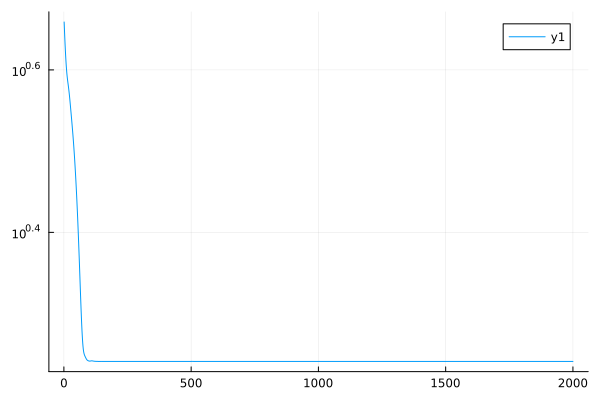

In [52]:
plot(lds, yaxis =:log)

In [53]:
history = [3, 4, 1, 7, 3, 5, 6, 1, 2]
println(hist2eq(history))
println(calc_score_σ(history, dms2, dm_test, Λρ(dm_test, dms2)))

UρUd M^{1/2} ρ ΛdUρUd M^{-1/2} Λ ρ Λσ 
0.47310275
